## Introduction to Geopandas

<center>
<img src="images/vector_head.png" width=500 align="center" />
</center>

### Importing geospatial data

Geospatial data is available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database ...

In order to read, write and manipulate geospatial data we can use the GeoPandas library to read many of those GIS file formats.

gpd.read_file is the workhorse for reading GIS files. It leverages the fiona package.

In order to dive deeper into geopandas we first need data. For this purpouse we will use the Natural Earth dataset

"Natural Earth is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software."* 

A subset comes bundled with GeoPandas and is accessible from the gpd.datasets module. We'll use it as a helpful global base layer map.

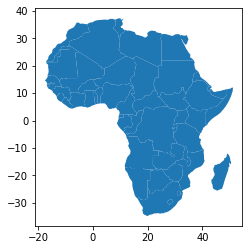

In [7]:
#%pip install geopandas
import geopandas as gpd

ndata = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file('/home/sth02bh/.local/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp')
africa = world[world['continent']=='Africa']
africa.plot()

Let’s see what datatype is our ‘data’

In [8]:
# View object type
type(world)

geopandas.geodataframe.GeoDataFrame

If you've never seen a **GeoDataFrame**, it is quite simple: 

- A **GeoDataFrame** is similar to a normal **DataDrame** in **Pandas** 

- **Only difference**: it has a 'geometry' column 

- it comes additional functionality for working with geospatial data. 

<center>
<img src="images/geoframe.png" width=500  />
</center>

Let’s take a look at our data and print the first 5 rows using the

In [13]:
# View  the top 6 lines of attribute table of data
world['gdp_md_est'].values

array([8.374000e+03, 1.506000e+05, 9.065000e+02, 1.674000e+06,
       1.856000e+07, 4.607000e+05, 2.023000e+05, 2.802000e+04,
       3.028000e+06, 8.794000e+05, 4.361000e+05, 6.601000e+04,
       4.719000e+03, 1.527000e+05, 1.763000e+05, 3.059000e+04,
       1.934000e+04, 1.619000e+05, 3.745000e+06, 9.066000e+03,
       2.818000e+02, 3.647000e+05, 2.173000e+03, 1.600000e+01,
       4.975000e+03, 7.391000e+05, 6.019000e+03, 2.307000e+06,
       7.325000e+04, 3.081000e+06, 7.835000e+04, 4.104000e+05,
       6.880000e+05, 9.312000e+04, 7.926000e+04, 3.355000e+04,
       4.319000e+04, 5.479000e+04, 1.318000e+05, 3.088000e+03,
       4.686000e+05, 6.093000e+03, 8.547000e+03, 2.699000e+06,
       1.824000e+05, 1.310000e+05, 2.539000e+04, 1.329000e+05,
       2.833000e+04, 3.590000e+04, 2.599000e+04, 3.972000e+04,
       3.809000e+04, 1.671000e+04, 2.431000e+04, 2.015000e+04,
       1.089000e+06, 7.724000e+04, 1.161000e+04, 1.208000e+05,
       8.712000e+04, 1.608000e+04, 2.851000e+03, 3.8810

### Geometry

Vector data contains discrete geometric locations (x, y) known as vertices that define the shape of the spatial object and attributes (also known as properties or characteristics). Spatial vector data can consist of different types, and the 3 fundamental types are: 

<center>
<img src="images/vector.png" width=600  />
</center>

**Points** (0-dimensional): Each individual point is defined by a single x, y coordinate. There can be many points in a vector point file. 
(e.g. GPS-coordinates, city locations, sample points ...)

**Lines** (1-dimensional): A line is composed of a sequence of two or more coordinate pairs. 
(e.g. roads, rivers, contour line ...)

**Polygons** (2-dimensional): A polygon is composed of one or more lines whose starting and ending coordinate pairs are the same. 
(e.g. boundary of countries, lakes, fields ...) 


### The shapely library
Geopandas takes advantage of Shapely’s geometric objects. The geometries for each spatial object is stored in a column called geometry.The individual geometry objects are provided by the shapely library

<class 'shapely.geometry.multipolygon.MultiPolygon'>


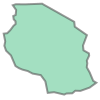

In [14]:
print(type(world.geometry[0]))
world.geometry[1]

Of course we can use the shapely library to construct our own vector data

In [16]:
from shapely.geometry import Point, Polygon, LineString

p = Point(4, 5)
p.x

4.0

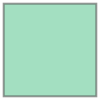

In [17]:
polygon = Polygon([(1, 1), (1,2), (2,2), (2, 1)])
polygon

<center>
<img src="images/gframe_att.png" width=600  />
</center>


And of course we can also create a geopandas dataframe and add some attributes

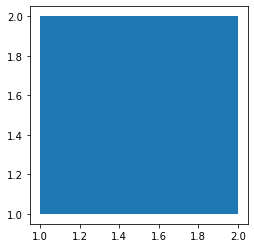

In [19]:
gdf = gpd.GeoDataFrame({
      'geometry': Polygon([(1, 1), (1,2), (2,2), (2, 1)]),
      'attribute1': ['Polygon'],
      'attribute2': [0.1]})
gdf
gdf.plot()

Since spatial data is stored as Shapely objects, it is possible to use all of the functionalities of Shapely

In [20]:
gdf.geom_type

0    Polygon
dtype: object

In [31]:
africa.bounds

minx       miny       maxx       maxy
1    29.339998 -11.720938  40.316590  -0.950000
2   -17.063423  20.999752  -8.665124  27.656426
11   12.182337 -13.257227  31.174149   5.256088
12   40.981050  -1.683250  51.133870  12.024640
13   33.893569  -4.676770  41.855083   5.506000
14   21.936810   8.229188  38.410090  22.000000
15   13.540394   7.421925  23.886890  23.409720
25   16.344977 -34.819166  32.830120 -22.091313
26   26.999262 -30.645106  29.325166 -28.647502
48   25.264226 -22.271612  32.849861 -15.507787
49   19.895458 -26.828543  29.432188 -17.661816
50   11.734199 -29.045462  25.084443 -16.941343
51  -17.625043  12.332090 -11.467899  16.598264
52  -12.170750  10.096361   4.270210  24.974574
53  -17.063423  14.616834  -4.923337  27.395744
54    0.772336   6.142158   3.797112  12.235636
55    0.295646  11.660167  15.903247  23.471668
56    2.691702   4.240594  14.577178  13.865924
57    8.488816   1.727673  16.012852  12.859396
58   -0.049785   5.928837   1.865241  11.018682
59   -3.244370   4.710462   1.060122  11.098341
60   -8.602880   4.338288  -2.562190  10.524061
61  -15.130311   7.309037  -7.832100  12.586183
62  -16.677452  11.040412 -13.700476  12.628170
63  -11.438779   4.355755  -7.539715   8.541055
64  -13.246550   6.785917 -10.230094  10.046984
65   -5.470565   9.610835   2.177108  15.116158
66   14.459407   2.267640  27.374226  11.142395
67   11.093773  -5.037987  18.453065   3.728197
68    8.797996  -3.978827  14.425456   2.326758
69    9.305613   1.010120  11.285079   2.283866
70   21.887843 -17.961229  33.485688  -8.238257
71   32.688165 -16.801300  35.771905  -9.230599
72   30.179481 -26.742192  40.775475 -10.317096
73   30.676609 -27.285879  32.071665 -25.660191
74   11.640096 -17.930636  24.079905  -4.438023
75   29.024926  -4.499983  30.752240  -2.348487
78   43.254187 -25.601434  50.476537 -12.040557
80  -16.841525  13.130284 -13.844963  13.876492
81    7.524482  30.307556  11.488787  37.349994
82   -8.684400  19.057364  11.999506  37.118381
154  36.323220  12.455416  43.081226  17.998307
162 -17.020428  21.420734  -1.124551  35.759988
163  24.700070  22.000000  36.866230  31.585680
164   9.319411  19.580470  25.164820  33.136996
165  32.954180   3.422060  47.789420  14.959430
166  41.661760  10.926879  43.317852  12.699639
167  42.558760   7.996880  48.948206  11.462040
168  29.579466  -1.443322  35.035990   4.249885
169  29.024926  -2.917858  30.816135  -1.134659
176  23.886980   3.509172  35.298007  12.248008

In [22]:
gdf.area

0    1.0
dtype: float64

In [23]:
polygon.distance(p)

3.605551275463989

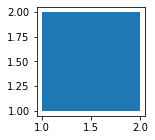

In [24]:
gdf.plot(figsize = (2,2))

### Data handling

The fact that our dataset is basically a pandas dataframe with additional information, we can apply pandas functions we already have learned. So we have all the pandas functionality available to use on the geospatial dataset, and to do data manipulations with the attributes and geometry information together.

In [25]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [34]:
africa = world[world['continent']=='Africa']
africa

pop_est continent                  name iso_a3  gdp_md_est  \
1     53950935    Africa              Tanzania    TZA    150600.0   
2       603253    Africa             W. Sahara    ESH       906.5   
11    83301151    Africa       Dem. Rep. Congo    COD     66010.0   
12     7531386    Africa               Somalia    SOM      4719.0   
13    47615739    Africa                 Kenya    KEN    152700.0   
14    37345935    Africa                 Sudan    SDN    176300.0   
15    12075985    Africa                  Chad    TCD     30590.0   
25    54841552    Africa          South Africa    ZAF    739100.0   
26     1958042    Africa               Lesotho    LSO      6019.0   
48    13805084    Africa              Zimbabwe    ZWE     28330.0   
49     2214858    Africa              Botswana    BWA     35900.0   
50     2484780    Africa               Namibia    NAM     25990.0   
51    14668522    Africa               Senegal    SEN     39720.0   
52    17885245    Africa                  Mali    MLI     38090.0   
53     3758571    Africa            Mauritania    MRT     16710.0   
54    11038805    Africa                 Benin    BEN     24310.0   
55    19245344    Africa                 Niger    NER     20150.0   
56   190632261    Africa               Nigeria    NGA   1089000.0   
57    24994885    Africa              Cameroon    CMR     77240.0   
58     7965055    Africa                  Togo    TGO     11610.0   
59    27499924    Africa                 Ghana    GHA    120800.0   
60    24184810    Africa         Côte d'Ivoire    CIV     87120.0   
61    12413867    Africa                Guinea    GIN     16080.0   
62     1792338    Africa         Guinea-Bissau    GNB      2851.0   
63     4689021    Africa               Liberia    LBR      3881.0   
64     6163195    Africa          Sierra Leone    SLE     10640.0   
65    20107509    Africa          Burkina Faso    BFA     32990.0   
66     5625118    Africa  Central African Rep.    CAF      3206.0   
67     4954674    Africa                 Congo    COG     30270.0   
68     1772255    Africa                 Gabon    GAB     35980.0   
69      778358    Africa            Eq. Guinea    GNQ     31770.0   
70    15972000    Africa                Zambia    ZMB     65170.0   
71    19196246    Africa                Malawi    MWI     21200.0   
72    26573706    Africa            Mozambique    MOZ     35010.0   
73     1467152    Africa              eSwatini    SWZ     11060.0   
74    29310273    Africa                Angola    AGO    189000.0   
75    11466756    Africa               Burundi    BDI      7892.0   
78    25054161    Africa            Madagascar    MDG     36860.0   
80     2051363    Africa                Gambia    GMB      3387.0   
81    11403800    Africa               Tunisia    TUN    130800.0   
82    40969443    Africa               Algeria    DZA    609400.0   
154    5918919    Africa               Eritrea    ERI      9169.0   
162   33986655    Africa               Morocco    MAR    282800.0   
163   97041072    Africa                 Egypt    EGY   1105000.0   
164    6653210    Africa                 Libya    LBY     90890.0   
165  105350020    Africa              Ethiopia    ETH    174700.0   
166     865267    Africa              Djibouti    DJI      3345.0   
167    3500000    Africa            Somaliland    -99     12250.0   
168   39570125    Africa                Uganda    UGA     84930.0   
169   11901484    Africa                Rwanda    RWA     21970.0   
176   13026129    Africa              S. Sudan    SSD     20880.0   

                                              geometry  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
11   POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...  
12   POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...  
13   POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...  
14   POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...  
15   POLYGON ((23.8

In [35]:
africa['pop_est']

1       53950935
2         603253
11      83301151
12       7531386
13      47615739
14      37345935
15      12075985
25      54841552
26       1958042
48      13805084
49       2214858
50       2484780
51      14668522
52      17885245
53       3758571
54      11038805
55      19245344
56     190632261
57      24994885
58       7965055
59      27499924
60      24184810
61      12413867
62       1792338
63       4689021
64       6163195
65      20107509
66       5625118
67       4954674
68       1772255
69        778358
70      15972000
71      19196246
72      26573706
73       1467152
74      29310273
75      11466756
78      25054161
80       2051363
81      11403800
82      40969443
154      5918919
162     33986655
163     97041072
164      6653210
165    105350020
166       865267
167      3500000
168     39570125
169     11901484
176     13026129
Name: pop_est, dtype: int64

Fortunately, geopandas has already a function which allows us to write our results as Shapefile

In [36]:
africa.to_file("Data/vector/africa.shp")

Of course GeoPandas provides additional functions for spatial analysis. We can iterate over the selected rows using a specific .iterrows() -function in (geo)pandas and print the area for each polygon:

In [37]:
for index, row in africa.iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:.3f}".format(africa['name'][index], poly_area))

Polygon area at index Tanzania is: 76.302
Polygon area at index W. Sahara is: 8.604
Polygon area at index Dem. Rep. Congo is: 189.515
Polygon area at index Somalia is: 39.528
Polygon area at index Kenya is: 48.033
Polygon area at index Sudan is: 156.445
Polygon area at index Chad is: 107.167
Polygon area at index South Africa is: 112.719
Polygon area at index Lesotho is: 2.562
Polygon area at index Zimbabwe is: 32.280
Polygon area at index Botswana is: 51.838
Polygon area at index Namibia is: 72.336
Polygon area at index Senegal is: 16.292
Polygon area at index Mali is: 105.097
Polygon area at index Mauritania is: 91.129
Polygon area at index Benin is: 9.641
Polygon area at index Niger is: 100.560
Polygon area at index Nigeria is: 74.592
Polygon area at index Cameroon is: 37.607
Polygon area at index Togo is: 5.007
Polygon area at index Ghana is: 19.974
Polygon area at index Côte d'Ivoire is: 27.033
Polygon area at index Guinea is: 19.786
Polygon area at index Guinea-Bissau is: 3.003
P

Beware that these area calculations are in the native degrees units, which is fairly useless

### CRS

A coordinate reference system (CRS) determines how the two-dimensional (planar) coordinates of the geometry objects should be related to actual places on the (non-planar) earth. The EPSG number (“European Petroleum Survey Group”) is a code that tells about the coordinate system of the dataset.You can find a lot of information about different available coordinate reference systems from: www.spatialreference.org

<center>
<img src="images/crs.png" width=800  />
</center>

In [38]:
# View CRS of object
africa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<center>
<img src="images/crs_wgs.gif" width=300 />
</center>

<center>
<img src="images/projected.png" width=700 />
</center>

Changing the projection is really easy to do in Geopandas with .to_crs() -function. As an input for the function, you should define the column containing the geometries, i.e. geometry in this case, and a epgs value of the projection that you want to use.

In [39]:
# Reprojecting data
web_mercator = world.to_crs('epsg:3785')

In [42]:
world['geometry'].head()
web_mercator['geometry'].head()

0    MULTIPOLYGON (((20037508.343 -1812498.413, 200...
1    POLYGON ((3774143.866 -105758.362, 3792946.708...
2    POLYGON ((-964649.018 3205725.605, -964597.245...
3    MULTIPOLYGON (((-13674486.249 6274861.394, -13...
4    MULTIPOLYGON (((-13674486.249 6274861.394, -13...
Name: geometry, dtype: geometry

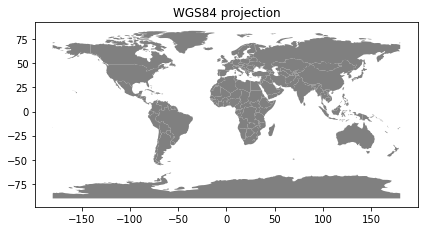

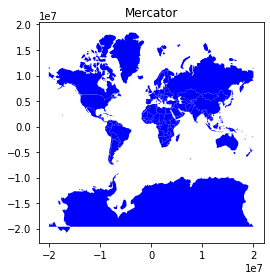

In [43]:
import matplotlib.pyplot as plt

world.plot(facecolor='gray');
plt.title("WGS84 projection");
plt.tight_layout()

web_mercator.plot(facecolor='blue');
plt.title("Mercator");
plt.tight_layout()

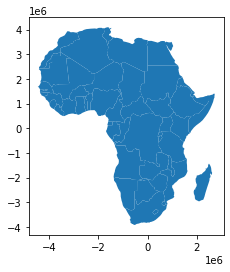

In [44]:
africa_aeac = africa.to_crs('esri:102022')
africa_aeac.plot()

Now we can calculate the actual area for each country. This time we append the result to the dataframe

In [45]:
africa_aeac['area'] = africa_aeac.area
africa_aeac

pop_est continent                  name iso_a3  gdp_md_est  \
1     53950935    Africa              Tanzania    TZA    150600.0   
2       603253    Africa             W. Sahara    ESH       906.5   
11    83301151    Africa       Dem. Rep. Congo    COD     66010.0   
12     7531386    Africa               Somalia    SOM      4719.0   
13    47615739    Africa                 Kenya    KEN    152700.0   
14    37345935    Africa                 Sudan    SDN    176300.0   
15    12075985    Africa                  Chad    TCD     30590.0   
25    54841552    Africa          South Africa    ZAF    739100.0   
26     1958042    Africa               Lesotho    LSO      6019.0   
48    13805084    Africa              Zimbabwe    ZWE     28330.0   
49     2214858    Africa              Botswana    BWA     35900.0   
50     2484780    Africa               Namibia    NAM     25990.0   
51    14668522    Africa               Senegal    SEN     39720.0   
52    17885245    Africa                  Mali    MLI     38090.0   
53     3758571    Africa            Mauritania    MRT     16710.0   
54    11038805    Africa                 Benin    BEN     24310.0   
55    19245344    Africa                 Niger    NER     20150.0   
56   190632261    Africa               Nigeria    NGA   1089000.0   
57    24994885    Africa              Cameroon    CMR     77240.0   
58     7965055    Africa                  Togo    TGO     11610.0   
59    27499924    Africa                 Ghana    GHA    120800.0   
60    24184810    Africa         Côte d'Ivoire    CIV     87120.0   
61    12413867    Africa                Guinea    GIN     16080.0   
62     1792338    Africa         Guinea-Bissau    GNB      2851.0   
63     4689021    Africa               Liberia    LBR      3881.0   
64     6163195    Africa          Sierra Leone    SLE     10640.0   
65    20107509    Africa          Burkina Faso    BFA     32990.0   
66     5625118    Africa  Central African Rep.    CAF      3206.0   
67     4954674    Africa                 Congo    COG     30270.0   
68     1772255    Africa                 Gabon    GAB     35980.0   
69      778358    Africa            Eq. Guinea    GNQ     31770.0   
70    15972000    Africa                Zambia    ZMB     65170.0   
71    19196246    Africa                Malawi    MWI     21200.0   
72    26573706    Africa            Mozambique    MOZ     35010.0   
73     1467152    Africa              eSwatini    SWZ     11060.0   
74    29310273    Africa                Angola    AGO    189000.0   
75    11466756    Africa               Burundi    BDI      7892.0   
78    25054161    Africa            Madagascar    MDG     36860.0   
80     2051363    Africa                Gambia    GMB      3387.0   
81    11403800    Africa               Tunisia    TUN    130800.0   
82    40969443    Africa               Algeria    DZA    609400.0   
154    5918919    Africa               Eritrea    ERI      9169.0   
162   33986655    Africa               Morocco    MAR    282800.0   
163   97041072    Africa                 Egypt    EGY   1105000.0   
164    6653210    Africa                 Libya    LBY     90890.0   
165  105350020    Africa              Ethiopia    ETH    174700.0   
166     865267    Africa              Djibouti    DJI      3345.0   
167    3500000    Africa            Somaliland    -99     12250.0   
168   39570125    Africa                Uganda    UGA     84930.0   
169   11901484    Africa                Rwanda    RWA     21970.0   
176   13026129    Africa              S. Sudan    SSD     20880.0   

                                              geometry          area  
1    POLYGON ((922537.240 -114575.437, 939987.876 -...  9.327378e+11  
2    POLYGON ((-3534685.828 3115442.123, -3534537.0...  9.669604e+10  
11   POLYGON ((448900.867 -534810.534, 467307.838 -...  2.323418e+12  
12   POLYGON ((1717804.547 -205991.843, 1657142.658...  4.841319e+11  
13   POLYGON ((1468849.544 -559808.809, 1321049.240...  5.90801

Let’s find out which country is the smallest and which is the biggest

In [46]:
# Maximum area
max_area = africa_aeac['area'].max()

# Mean area
min_area = africa_aeac['area'].min()

print("Max area: %s\nMean area: %s" % (round(max_area, 2), round(min_area, 2)))


Max area: 2323418470416.92
Mean area: 14029048158.27


But which country is now the biggest/smallest. Take a guess.

In [47]:
max_area_country = africa_aeac[africa_aeac['area'] == max_area]
max_area_country

pop_est continent             name iso_a3  gdp_md_est  \
11  83301151    Africa  Dem. Rep. Congo    COD     66010.0   

                                             geometry          area  
11  POLYGON ((448900.867 -534810.534, 467307.838 -...  2.323418e+12

In [48]:
min_area_country = africa_aeac[africa_aeac['area'] == min_area]
min_area_country

pop_est continent    name iso_a3  gdp_md_est  \
80  2051363    Africa  Gambia    GMB      3387.0   

                                             geometry          area  
80  POLYGON ((-4352160.601 1555752.108, -4238595.3...  1.402905e+10

Of course we can now also add the temperature data we used in the last session

In [51]:
import pandas as pd
temp = pd.read_csv('Data/non-spatial/GlobalLandTemperatures/GlobalLandTemperaturesByCountry_2000_2013.csv')

temp['name'] = temp['Country']
africa

africa_temp = africa.merge(temp, on='name')

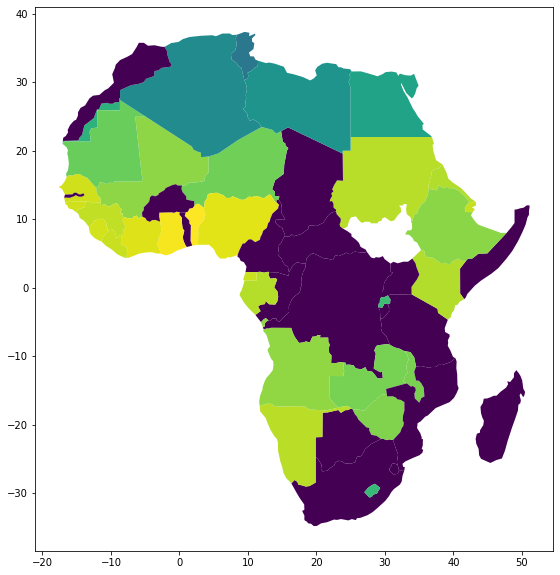

In [56]:
africa_temp_20130601 = africa_temp[africa_temp['dt'] == '2013-02-01']

africa_temp_20130601.plot(figsize=(10,10), column='AverageTemperature')

In [57]:
africa_temp.to_file('Data/vector/africa_temp.shp')

### Spatial relations

Spatial relationships are important aspect of geospatial data if we want to know how two spatial objects relate to each other. 

<br>

<center>
<img src="images/spatialrelation.png" width=800  />
</center>

In [58]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities

name                     geometry
0    Vatican City    POINT (12.45339 41.90328)
1      San Marino    POINT (12.44177 43.93610)
2           Vaduz     POINT (9.51667 47.13372)
3      Luxembourg     POINT (6.13000 49.61166)
4         Palikir    POINT (158.14997 6.91664)
..            ...                          ...
197         Cairo    POINT (31.24802 30.05191)
198         Tokyo   POINT (139.74946 35.68696)
199         Paris     POINT (2.33139 48.86864)
200      Santiago  POINT (-70.66899 -33.44807)
201     Singapore    POINT (103.85387 1.29498)

[202 rows x 2 columns]

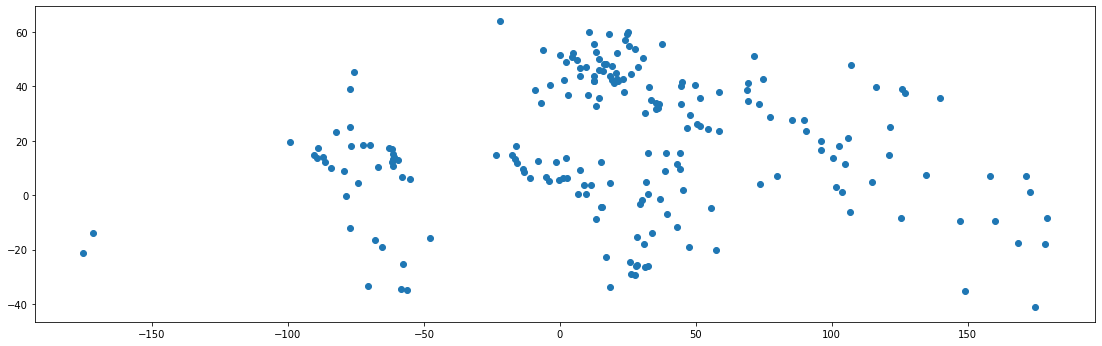

In [61]:
cities.plot(figsize=(19,10))

In the next step we will clip our cities dataset to the african continent and 

name                    geometry
13          Kigali   POINT (30.05859 -1.95164)
14         Mbabane  POINT (31.13333 -26.31665)
15            Juba    POINT (31.58003 4.82998)
24          Banjul  POINT (-16.59170 13.45388)
27       Bujumbura   POINT (29.36001 -3.37609)
36            Lome     POINT (1.22081 6.13388)
37           Tunis   POINT (10.17968 36.80278)
40          Lusaka  POINT (28.28138 -15.41470)
41          Harare  POINT (31.04276 -17.81584)
48         Kampala    POINT (32.58138 0.31860)
50          Niamey    POINT (2.11471 13.51865)
57    Bloemfontein  POINT (26.22991 -29.11999)
58        Pretoria  POINT (28.22748 -25.70497)
62           Rabat   POINT (-6.83641 34.02531)
64          Maputo  POINT (32.58722 -25.95333)
65       Mogadishu    POINT (45.36473 2.06863)
70        Windhoek  POINT (17.08355 -22.57001)
71           Abuja     POINT (7.53138 9.08528)
72          Bissau  POINT (-15.59836 11.86502)
77          Maseru  POINT (27.48327 -29.31667)
78    Antananarivo  POINT (47.51468 -18.91469)
83        Ndjamena   POINT (15.04720 12.11504)
85          Asmara   POINT (38.93332 15.33334)
88        Lilongwe  POINT (33.78330 -13.98330)
90      Libreville     POINT (9.45797 0.38539)
92      Nouakchott  POINT (-15.97534 18.08643)
93          Bamako   POINT (-8.00198 12.65196)
98     Brazzaville   POINT (15.28274 -4.25724)
99         Conakry   POINT (-13.68218 9.53347)
100   Yamoussoukro    POINT (-5.27550 6.81838)
106         Bangui    POINT (18.55829 4.36664)
107        Yaounde    POINT (11.51470 3.86865)
113        Cotonou     POINT (2.51804 6.40195)
117       Gaborone  POINT (25.91195 -24.64631)
119    Ouagadougou   POINT (-1.52667 12.37226)
123       Hargeysa    POINT (44.06531 9.56002)
140       Khartoum   POINT (32.53223 15.59002)
144  Dar es Salaam   POINT (39.26640 -6.79807)
146       Monrovia   POINT (-10.79966 6.31458)
152          Accra    POINT (-0.21866 5.55198)
156        Abidjan    POINT (-4.04199 5.32194)
160         Luanda   POINT (13.23248 -8.83634)
161        Algiers    POINT (3.04861 36.76501)
170          Dakar  POINT (-17.47508 14.71778)
171   Johannesburg  POINT (28.02806 -26.16810)
176       Kinshasa   POINT (15.31303 -4.32778)
180    Addis Ababa    POINT (38.69806 9.03526)
189      Cape Town  POINT (18.43304 -33.91807)
194        Nairobi   POINT (36.81471 -1.28140)
197          Cairo   POINT (31.24802 30.05191)

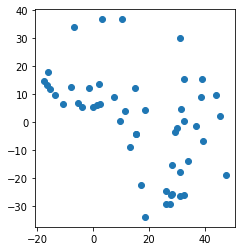

In [63]:
cities_africa = gpd.clip(cities, africa)
cities_africa.plot()
cities_africa

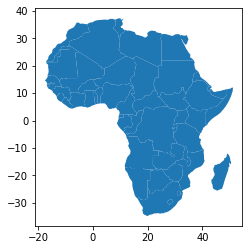

In [65]:
#import geopandas as gpd
africa = gpd.read_file("./Data/vector/africa.shp")
africa.plot()

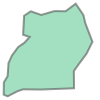

In [68]:
from shapely.geometry import LineString

uganda = africa.loc[africa['name'] == 'Uganda', 'geometry'].squeeze()

kampala = cities_africa.loc[cities_africa['name'] == 'Kampala', 'geometry'].squeeze()
bamako = cities_africa.loc[cities_africa['name'] == 'Bamako', 'geometry'].squeeze()

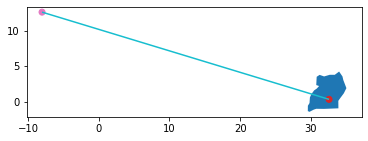

In [69]:
line = LineString([kampala, bamako])

gpd.GeoSeries([uganda, kampala, bamako , line]).plot(cmap='tab10')

Kampala, the capital of Uganda, is thus located within Uganda. This is a spatial relationship, and we can test this using the individual shapely geometry objects as follow:

In [70]:
kampala.within(uganda)

True

And using the reverse, Uganda contains Kampala:

In [71]:
uganda.contains(kampala)

True

Of course many other spatial relations can be tested, e.g.

In [75]:
uganda.contains(bamako)
bamako.within(uganda)
uganda.contains(line)
line.intersects(uganda)

True

The same methods that are available on individual shapely geometries as we have seen above, are also available as methods on GeoSeries / GeoDataFrame objects.

In [78]:
africa.contains(kampala)
africa[africa.contains(kampala)]

pop_est continent    name iso_a3  gdp_md_est  \
48  39570125    Africa  Uganda    UGA     84930.0   

                                             geometry  
48  POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...

Overview of the different functions to check spatial relationships:

- `equals`
- `contains`
- `crosses`
- `disjoint`
- `intersects`
- `overlaps`
- `touches`
- `within`
- `covers`


Shapely and GeoPandas aslo provide spatial operations that return new geometric objects.
Let's construct a buffer around Kampala:

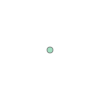

In [80]:
kampala

In [81]:
gpd.GeoSeries([uganda, kampala.buffer(2)])

0    POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...
1    POLYGON ((34.58138 0.31860, 34.57175 0.12257, ...
dtype: geometry

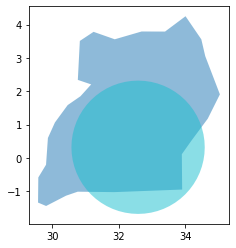

In [82]:
gpd.GeoSeries([uganda, kampala.buffer(2)]).plot(alpha=0.5, cmap='tab10')

and now take the intersection, union or difference of those two polygons:

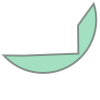

In [85]:
kampala.buffer(2).intersection(uganda)

kampala.buffer(2).union(uganda)

kampala.buffer(2).difference(uganda)

## Visualization

Now we know how to use geopandas it is time to create some maps. The most simple way to create a map is to used the in-built plot function

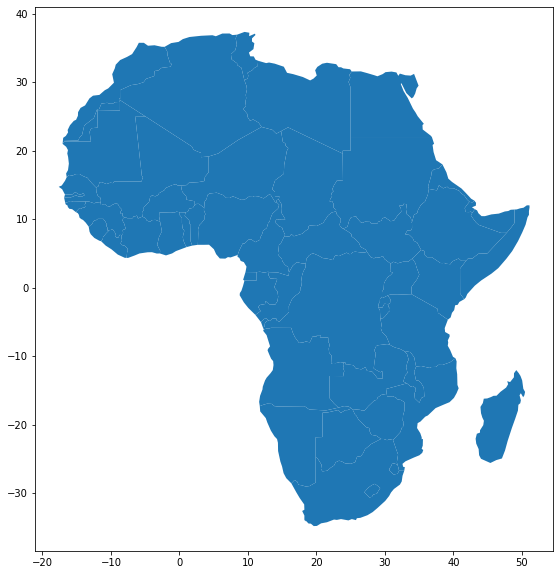

In [86]:
import geopandas as gpd

africa = gpd.read_file('Data/vector/africa.shp')
africa.plot(figsize=(10,10))

But let's create a more advanced map. Therefor we can use the matplotlib library

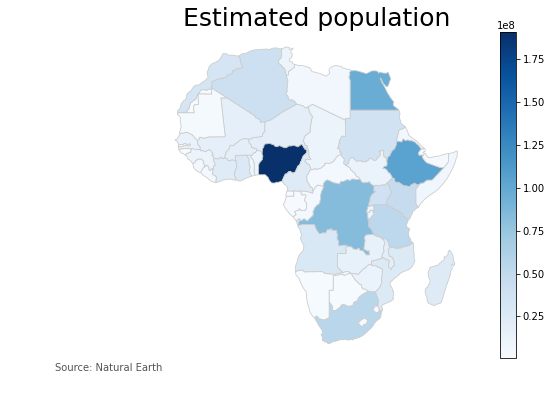

In [87]:
import matplotlib.pyplot as plt

# set the range for the choropleth
vmin, vmax = africa.pop_est.min() , africa.pop_est.max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
africa.plot(column='pop_est', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Estimated population', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Natural Earth',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)

The geoplot packages provides some additional functionality compared to the basic .plot() method on GeoDataFrames



In [88]:
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

<ipython-input-89-8fbfd860eee1>:7: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(True)


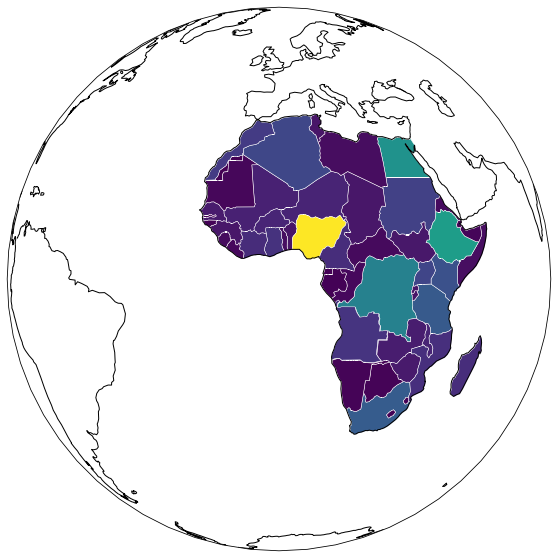

In [89]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={
    'projection': gcrs.Orthographic(central_latitude=0, central_longitude=0)
})
geoplot.choropleth(africa, hue='pop_est', projection=gcrs.Orthographic(), ax=ax,
                   linewidth=0.5, edgecolor='white')
ax.set_global()
ax.outline_patch.set_visible(True)
ax.coastlines()

## Interactive web-based visualizations

There are nowadays many libraries that target interactive web-based visualizations:

- Bokeh: https://bokeh.pydata.org/en/latest/docs/gallery/texas.html
- GeoViews (other interface to Bokeh/matplotlib): http://geo.holoviews.org
- Altair: https://altair-viz.github.io/gallery/choropleth.html
- Plotly: https://plot.ly/python/#maps
    ...


Another popular javascript library for online maps is Leaflet.js, and this has python bindings in the folium and ipyleaflet packages. We basically give it minimal instructions, JS does loads of work in the background and we get some very, very cool maps. 

In [90]:
import ipyleaflet

m = ipyleaflet.Map(center=[0, 0], zoom=2)

layer = ipyleaflet.GeoJSON(data=africa.__geo_interface__)
m.add_layer(layer)
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [91]:
from ipyleaflet import Map, basemaps, basemap_to_tiles

m = ipyleaflet.Map(center=[0, 0], zoom=2, basemap=basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2020-04-08"))

layer = ipyleaflet.GeoJSON(data=africa.__geo_interface__)
m.add_layer(layer)
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [92]:
import folium

m = folium.Map([0, 0], zoom_start=2, tiles="OpenStreetMap")
folium.Choropleth(geo_data=africa, data=africa, columns=['name', 'pop_est'],
             key_on='feature.properties.name', fill_color='BuGn', highlight=True).add_to(m)
m

## Advanced Examples

Interactive Weather Maps in Python

Source: https://medium.com/@plotlygraphs/how-to-create-2d-and-3d-interactive-weather-maps-in-python-and-r-77ddd53cca8

/home/sth02bh/.local/lib/python3.8/site-packages/scipy/io/netcdf.py:311: RuntimeWarning:

Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)

/home/sth02bh/.local/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/home/sth02bh/.local/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:62: DeprecationWarning:

plotly.graph_objs.Annotations is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.layo

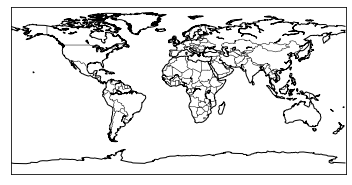

In [93]:
import plotly
import plotly.offline as py
from plotly.graph_objs import *
py.init_notebook_mode(connected=False)
from plotly.graph_objs.layout import *
from plotly.graph_objs.scatter import *
import numpy as np           
from scipy.io import netcdf  
from mpl_toolkits.basemap import Basemap


f_path = 'Data/raster/compday.uD1lrjCi2B.nc' 

# Retrieve data from NetCDF file
with netcdf.netcdf_file(f_path, 'r') as f:
    lon = f.variables['lon'][::]    # copy as list
    lat = f.variables['lat'][::-1]  # invert the latitude vector -> South to North
    air = f.variables['prate'][0,::-1,:]  # squeeze out the time dimension, 
                                        # invert latitude index
# Shift 'lon' from [0,360] to [-180,180], make numpy array
tmp_lon = np.array([lon[n]-360 if l>=180 else lon[n] 
                   for n,l in enumerate(lon)])  # => [0,180]U[-180,2.5]

i_east, = np.where(tmp_lon>=0)  # indices of east lon
i_west, = np.where(tmp_lon<0)   # indices of west lon
lon = np.hstack((tmp_lon[i_west], tmp_lon[i_east]))  # stack the 2 halves

# Correspondingly, shift the 'precip' array
precip_air = np.array(air)
air = np.hstack((precip_air[:,i_west], precip_air[:,i_east]))
trace1 = Contour(
    z=air,
    x=lon,
    y=lat,
    colorscale= [[0.0, '#543005'], [0.07692307692307693, '#7f4909'], [0.15384615384615385, '#a76a1d'], [0.23076923076923078, '#c99545'], [0.3076923076923077, '#e1c582'], [0.38461538461538464, '#f2e2b8'], [0.46153846153846156, '#f6f0e2'], [0.5384615384615384, '#e4f1ef'], [0.6153846153846154, '#bce6e0'], [0.6923076923076923, '#86cfc4'], [0.7692307692307693, '#4ea79e'], [0.8461538461538461, '#218078'], [0.9230769230769231, '#015c53'], [1.0, '#003c30']],
    zauto=False,  # custom contour levels
    zmin=-3,      # first contour level
    zmax=3,        # last contour level  => colorscale is centered about 0
    
colorbar= {
    "borderwidth": 0, 
    "outlinewidth": 0, 
    "thickness": 15, 
    "tickfont": {"size": 14}, 
    "title": "mm/day"}, #gives your legend some units                                                                     

contours= {
    "end": 2.5, 
    "showlines": False, 
    "size": 0.25, #this is your contour interval
    "start": -2.5}     
    
)    
# Make shortcut to Basemap object, 
# not specifying projection type for this example
m = Basemap() 

# Make trace-generating function (return a Scatter object)
def make_scatter(x,y):
    return Scatter(
        x=x,
        y=y,
        mode='lines',
        line=Line(color="black"),
        name=' '  # no name on hover
    )

# Functions converting coastline/country polygons to lon/lat traces
def polygons_to_traces(poly_paths, N_poly):
    ''' 
    pos arg 1. (poly_paths): paths to polygons
    pos arg 2. (N_poly): number of polygon to convert
    '''
    # init. plotting list
    data = dict(
        x=[],
        y=[],
        mode='lines',
        line=Line(color="black"),
        name=' '
    )

    for i_poly in range(N_poly):
        poly_path = poly_paths[i_poly]
        
        # get the Basemap coordinates of each segment
        coords_cc = np.array(
            [(vertex[0],vertex[1]) 
             for (vertex,code) in poly_path.iter_segments(simplify=False)]
        )
        
        # convert coordinates to lon/lat by 'inverting' the Basemap projection
        lon_cc, lat_cc = m(coords_cc[:,0],coords_cc[:,1], inverse=True)
    
        
        # add plot.ly plotting options
        data['x'] = data['x'] + lon_cc.tolist() + [np.nan]
        data['y'] = data['y'] + lat_cc.tolist() + [np.nan]
        
        # traces.append(make_scatter(lon_cc,lat_cc))
     
    return [data]

# Function generating coastline lon/lat traces
def get_coastline_traces():
    poly_paths = m.drawcoastlines().get_paths() # coastline polygon paths
    N_poly = 91  # use only the 91st biggest coastlines (i.e. no rivers)
    return polygons_to_traces(poly_paths, N_poly)

# Function generating country lon/lat traces
def get_country_traces():
    poly_paths = m.drawcountries().get_paths() # country polygon paths
    N_poly = len(poly_paths)  # use all countries
    return polygons_to_traces(poly_paths, N_poly)

# Get list of of coastline, country, and state lon/lat traces
traces_cc = get_coastline_traces()+get_country_traces()
data = Data([trace1]+traces_cc)

title = u"Surface Precipitation Rate Anomalies<br>Dec 2017-Jan 2018"

anno_text = "Data courtesy of \
<a href='http://www.esrl.noaa.gov/psd/data/composites/day/'>\
NOAA Earth System Research Laboratory</a>"

axis_style = dict(
    zeroline=False,
    showline=False,
    showgrid=False,
    ticks='',
    showticklabels=False,
)

layout = Layout(
    title=title,
    showlegend=False,
    hovermode="closest",        # highlight closest point on hover
    xaxis=XAxis(
        axis_style,
        range=[lon[0],lon[-1]]  # restrict y-axis to range of lon
    ),
    yaxis=YAxis(
        axis_style,
    ),
    annotations=Annotations([
        Annotation(
            text=anno_text,
            xref='paper',
            yref='paper',
            x=0,
            y=1,
            yanchor='bottom',
            showarrow=False
        )
    ]),
    autosize=False,
    width=1200,
    height=800,
)

fig = Figure(data=data, layout=layout)

py.iplot(fig, filename="NCEP Precipitation")

Interactive Map of the NYC bicycle sharing program

Source:https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9

In [94]:
import pandas as pd
bike_data = pd.read_csv("Data/non-spatial/citibike-tripdata_example.csv") 
bike_data

Unnamed: 0  tripduration                 starttime  \
0               0          1589  2020-03-01 00:00:03.6400   
1               1           389  2020-03-01 00:00:16.7560   
2               2           614  2020-03-01 00:00:20.0580   
3               3           597  2020-03-01 00:00:24.3510   
4               4          1920  2020-03-01 00:00:26.1120   
...           ...           ...                       ...   
39995       39995          1201  2020-03-02 08:22:53.5030   
39996       39996           348  2020-03-02 08:22:53.6170   
39997       39997           379  2020-03-02 08:22:53.6980   
39998       39998           545  2020-03-02 08:22:53.8900   
39999       39999           871  2020-03-02 08:22:54.9300   

                       stoptime  start station id          start station name  \
0      2020-03-01 00:26:32.9860               224       Spruce St & Nassau St   
1      2020-03-01 00:06:46.0620               293       Lafayette St & E 8 St   
2      2020-03-01 00:10:34.2200               379             W 31 St & 7 Ave   
3      2020-03-01 00:10:22.3390              3739    Perry St & Greenwich Ave   
4      2020-03-01 00:32:26.2680               236         St Marks Pl & 2 Ave   
...                         ...               ...                         ...   
39995  2020-03-02 08:42:54.7090              3002  South End Ave & Liberty St   
39996  2020-03-02 08:28:41.8970               501         FDR Drive & E 35 St   
39997  2020-03-02 08:29:12.7650               388            W 26 St & 10 Ave   
39998  2020-03-02 08:31:58.9870              3709             W 15 St & 6 Ave   
39999  2020-03-02 08:37:26.5930               426       West St & Chambers St   

       start station latitude  start station longitude  end station id  \
0                   40.711464               -74.005524            3574   
1                   40.730207               -73.991026             223   
2                   40.749156               -73.991600             515   
3                   40.735918               -74.000939             325   
4                   40.728419               -73.987140            3124   
...                       ...                      ...             ...   
39995               40.711512               -74.015756             168   
39996               40.744219               -73.971212            2012   
39997               40.749718               -74.002950            3641   
39998               40.738046               -73.996430             465   
39999               40.717548               -74.013221             405   

                    end station name  end station latitude  \
0        Prospect Pl & Underhill Ave             40.676969   
1                    W 13 St & 7 Ave             40.737815   
2                   W 43 St & 10 Ave             40.760094   
3                    E 19 St & 3 Ave             40.736245   
4                      46 Ave & 5 St             40.747310   
...                              ...                   ...   
39995                W 18 St & 6 Ave             40.739713   
39996                E 27 St & 1 Ave             40.739445   
39997             Broadway & W 25 St             40.742869   
39998             Broadway & W 41 St             40.755136   
39999  Washington St & Gansevoort St             40.739323   

       end station longitude  bikeid    usertype  birth year  gender  
0                 -73.965790   16214  Subscriber        1980       1  
1                 -73.999947   29994  Subscriber        1991       2  
2                 -73.994618   39853  Subscriber        1991       1  
3                 -73.984738   42608  Subscriber        1989       1  
4                 -73.954510   36288  Subscriber        1993       1  
...                      ...     ...         ...         ...     ...  
39995             -73.994564   34236    Customer        1969       0  
39996             -73.976806   20519  Subscriber        1972       0  
39997             -73.989186

In [95]:
bike_data["starttime"] = pd.to_datetime(bike_data["starttime"])
bike_data["stoptime"] = pd.to_datetime(bike_data["stoptime"])
bike_data["hour"] = bike_data["starttime"].map(lambda x: x.hour)

In [96]:
def get_trip_counts_by_hour(selected_hour):
    # make a DataFrame with locations for each bike station
    locations = bike_data.groupby("start station id").first()
    locations = locations.loc[:, ["start station latitude",
                                 "start station longitude",
                                 "start station name"]]
    
    #select one time of day
    subset = bike_data[bike_data["hour"]==selected_hour]
    
    # count trips for each destination
    departure_counts =  subset.groupby("start station id").count()
    departure_counts = departure_counts.iloc[:,[0]]
    departure_counts.columns= ["departure count"]
    
    # count trips for each origin
    arrival_counts =  subset.groupby("end station id").count().iloc[:,[0]]
    arrival_counts.columns= ["arrival count"]

    #join departure counts, arrival counts, and locations
    trip_counts = departure_counts.join(locations).join(arrival_counts)
    return trip_counts

# print a sample to check our code works
get_trip_counts_by_hour(6).head()

def plot_station_counts(trip_counts):
    # generate a new map
    folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=13,
                            tiles="CartoDB dark_matter",
                            width='50%')

    # for each row in the data, add a cicle marker
    for index, row in trip_counts.iterrows():
        # calculate net departures
        net_departures = (row["departure count"]-row["arrival count"])
        
        # generate the popup message that is shown on click.
        popup_text = "{}<br> total departures: {}<br> total arrivals: {}<br> net departures: {}"
        popup_text = popup_text.format(row["start station name"],
                          row["arrival count"],
                          row["departure count"],
                          net_departures)
        
        # radius of circles
        radius = net_departures/20
        
        # choose the color of the marker
        if net_departures>0:
            # color="#FFCE00" # orange
            # color="#007849" # green
            color="#E37222" # tangerine
        else:
            # color="#0375B4" # blue
            # color="#FFCE00" # yellow            
            color="#0A8A9F" # teal
        
        # add marker to the map
        folium.CircleMarker(location=(row["start station latitude"],
                                      row["start station longitude"]),
                            radius=radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)
    return folium_map

In [97]:
# plot net departures at 9AM

trip_counts = get_trip_counts_by_hour(9)
plot_station_counts(trip_counts)

### Additional Content: Retrieving OpenStreetMap data

In [98]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

place_name = "Maxvorstadt ,Munich, Germany"
graph = ox.graph_from_place(place_name, network_type='drive')
nodes, edges = ox.graph_to_gdfs(graph)
buildings = ox.footprints_from_place(place_name) 
university = ox.pois_from_place(place_name, amenities=['university'])


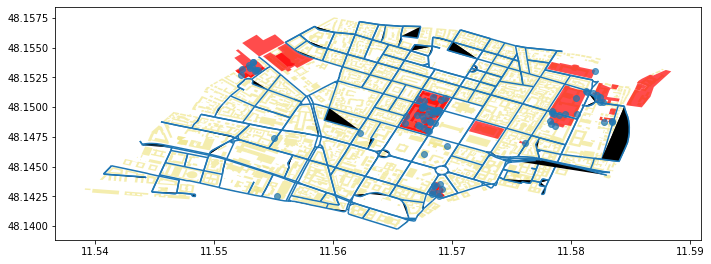

In [100]:
fig, ax = plt.subplots(figsize=(10,10))
edges.plot(ax=ax, facecolor='black')
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)
university.plot(ax=ax, facecolor='red', alpha=0.7)

plt.tight_layout()

In [104]:
pois = university[(university['name'] == 'Lehrstuhl für Kartographie') | (university['name'] == 'Technische Universität München / Modelierung Räumlicher Mobilität')]
university

osmid                                           geometry  \
283031238  283031238                          POINT (11.57952 48.14943)   
283031240  283031240                          POINT (11.58243 48.15086)   
436585145  436585145                          POINT (11.55296 48.15356)   
639131830  639131830                          POINT (11.58131 48.15134)   
956326801  956326801                          POINT (11.57846 48.14964)   
...              ...                                                ...   
355483076  355483076  POLYGON ((11.58561 48.15200, 11.58577 48.15195...   
449701274  449701274  POLYGON ((11.58384 48.14984, 11.58368 48.14934...   
694786638  694786638  POLYGON ((11.56773 48.15083, 11.56788 48.15079...   
832961760  832961760  POLYGON ((11.57205 48.14884, 11.57265 48.14868...   
10326183    10326183  MULTIPOLYGON (((11.55515 48.15611, 11.55598 48...   

              amenity                     contact:website  \
283031238  university  http://www.physik.uni-muenchen.de/   
283031240  university                                 NaN   
436585145         NaN                                 NaN   
639131830    post_box                                 NaN   
956326801         NaN                                 NaN   
...               ...                                 ...   
355483076  university                                 NaN   
449701274  university                                 NaN   
694786638  university                                 NaN   
832961760  university                                 NaN   
10326183   university                                 NaN   

                                                        name wheelchair  \
283031238                                Fakultät für Physik        yes   
283031240                               Juristisches Seminar        yes   
436585145                                                NaN        NaN   
639131830                                                NaN        NaN   
956326801                                                NaN         no   
...                                                      ...        ...   
355483076  Nano-Institut der Ludwig-Maximilians-Universit...        NaN   
449701274                     Ludwig-Maximilians-Universität        NaN   
694786638                                                 N9        NaN   
832961760                     Ludwigs-Maximilian-Universität        NaN   
10326183    Hochschule für angewandte Wissenschaften München        NaN   

          element_type addr:city addr:housenumber addr:postcode  ... name:pt  \
283031238         node       NaN              NaN           NaN  ...     NaN   
283031240         node   München                2         80539  ...     NaN   
436585145         node       NaN              NaN           NaN  ...     NaN   
639131830         node       NaN              NaN           NaN  ...     NaN   
956326801         node       NaN              NaN           NaN  ...     NaN   
...                ...       ...              ...           ...  ...     ...   
355483076          way       NaN              NaN           NaN  ...     NaN   
449701274          way       NaN              NaN           NaN  ...     NaN   
694786638          way       NaN              NaN           NaN  ...     NaN   
832961760          way       NaN              NaN           NaN  ...     NaN   
10326183      relation       NaN              NaN           NaN  ...     NaN   

          name:sv informal_name building:levels:underground  \
283031238     NaN           NaN                         NaN   
283031240     NaN           NaN                         NaN   
436585145     NaN           NaN                         NaN   
639131830     NaN           NaN                         NaN   
956326801     NaN           NaN                         NaN   
...           ...           ...                         ...   
355483076     NaN           NaN                         NaN   
449701274     N

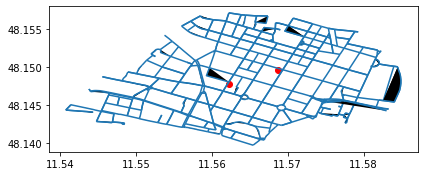

In [105]:
fig, ax = plt.subplots()
edges.plot(ax=ax, facecolor='black')
pois.plot(ax=ax, facecolor='red')

plt.tight_layout()

### Additional Conetent 2: Networks 

In [106]:
orig_xy = (pois.iloc[0].geometry.y, pois.iloc[0].geometry.x)
target_xy = (pois.iloc[1].geometry.y,pois.iloc[1].geometry.x)
orig_node = ox.get_nearest_node(graph, orig_xy, method='euclidean')
target_node = ox.get_nearest_node(graph, target_xy, method='euclidean')

In [107]:
o_closest = nodes.loc[orig_node]
t_closest = nodes.loc[target_node]

In [108]:
od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes.crs)
od_nodes.head()

y          x      osmid          highway  \
967091764  48.149689  11.569351  967091764  traffic_signals   
29560441   48.148075  11.562231   29560441              NaN   

                            geometry  
967091764  POINT (11.56935 48.14969)  
29560441   POINT (11.56223 48.14807)

In [109]:
route = nx.shortest_path(G=graph, source=orig_node, target=target_node, weight='length')
print(route)

[967091764, 345553442, 21457470, 1954396, 4972204765, 21457469, 13888123, 29560441]


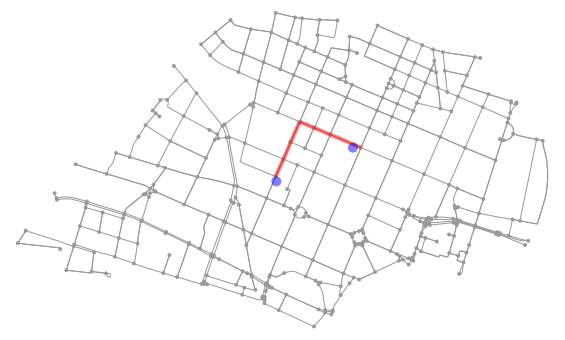

In [110]:
fig, ax = ox.plot_graph_route(graph, route, origin_point=orig_xy, destination_point=target_xy)

## Exercise

- Import the datasets_105806_252067_stations.csv (Data/non-spatial)dataset and create a GeoPandasDataFrame (Hint: don't forget to set the CRS)
- How many features are there in the dataset? 
- Make a quick plot of the stations dataset.
- Create a nice map of all bike stations in London 
- Make a histogram showing the distribution of capacities in the stations
- Create a spatial point object with the coordinates of the Big Ben
- Import the london_boroughs dataset (Data/vector)
- Check if the Big Ben is located within Westminster
- How many bike stations are in Westminster
- Determine for each bike station in which borough it is located
- Create a map showing the bike station density in each district
- Calculate the distance to the Big Ben for each station
- Print the distance and the name of the closest station
- Create a plot with the Big Ben and all the stations where the distance to the Big Ben is less than 1 km. Colorize each station depending on thier distance to the Big Ben